In [1]:

import pandas as pd
hdb_df = pd.read_csv("GBA_HDB.csv")
display(hdb_df)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
1245,2015-01,YISHUN,5 ROOM,234,YISHUN ST 21,01 TO 03,134.0,Model A,1985,69,460000.0
1246,2015-01,YISHUN,5 ROOM,419,YISHUN AVE 11,10 TO 12,133.0,Model A,1993,77,500000.0
1247,2015-01,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,72,525888.0
1248,2015-01,YISHUN,EXECUTIVE,405,YISHUN AVE 6,10 TO 12,142.0,Apartment,1988,72,538000.0


In [2]:
hdb_df.shape

(1250, 11)

In [3]:
missing_hdb_df = pd.read_csv("GBA_HDB.csv", na_filter = True)
missing_hdb_df.isnull().sum(axis=0)

month                    0
town                     0
flat_type               40
block                    0
street_name              1
storey_range             0
floor_area_sqm           0
flat_model               0
lease_commence_date      0
remaining_lease          0
resale_price           134
dtype: int64

In [4]:
# Checking record with missing street_name
df = pd.DataFrame(missing_hdb_df)
nan_street = df[missing_hdb_df['street_name'].isna()]
display (nan_street)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
135,2015-01,BEDOK,5 ROOM,659,NaN,04 TO 06,126.0,Improved,1996,80,NaN


In [5]:
# Drop column “street_name”
clean1 = missing_hdb_df.drop(['street_name'], axis=1)
display(clean1)


,month,town,flat_type,block,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...
1245,2015-01,YISHUN,5 ROOM,234,01 TO 03,134.0,Model A,1985,69,460000.0
1246,2015-01,YISHUN,5 ROOM,419,10 TO 12,133.0,Model A,1993,77,500000.0
1247,2015-01,YISHUN,EXECUTIVE,352,04 TO 06,146.0,Maisonette,1988,72,525888.0
1248,2015-01,YISHUN,EXECUTIVE,405,10 TO 12,142.0,Apartment,1988,72,538000.0


In [6]:
# Fill the flat_type using highest occurring flat_type according to floor_area_ sqm
clean2 = pd.DataFrame(clean1)
# Group the data by floor_area_sqm and corresponding flat_type and use most frequently occurring flat_type within each floor_area_sqm to fill the missing flat_types
clean2['flat_type'] = df.groupby(['floor_area_sqm'])['flat_type'].transform(lambda x: x.fillna(x.mode().iloc[0]))
# Display the data after filling in the missing flat_type
display(clean2)

,month,town,flat_type,block,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...
1245,2015-01,YISHUN,5 ROOM,234,01 TO 03,134.0,Model A,1985,69,460000.0
1246,2015-01,YISHUN,5 ROOM,419,10 TO 12,133.0,Model A,1993,77,500000.0
1247,2015-01,YISHUN,EXECUTIVE,352,04 TO 06,146.0,Maisonette,1988,72,525888.0
1248,2015-01,YISHUN,EXECUTIVE,405,10 TO 12,142.0,Apartment,1988,72,538000.0


In [9]:
# Ensure missing flat_types are filled
clean2.isnull().sum()


month                  0
town                   0
flat_type              0
block                  0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [10]:
# Fill the missing resale_price using mean of each flat type
# Calculate the mean resale_price for each flat type
mean_prices = clean2.groupby('flat_type')['resale_price'].transform('mean')


# Fill missing resale_price values using the calculated means
clean2['resale_price'].fillna(mean_prices, inplace=True)
# Print the updated DataFrame
display(clean2)

,month,town,flat_type,block,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...
1245,2015-01,YISHUN,5 ROOM,234,01 TO 03,134.0,Model A,1985,69,460000.0
1246,2015-01,YISHUN,5 ROOM,419,10 TO 12,133.0,Model A,1993,77,500000.0
1247,2015-01,YISHUN,EXECUTIVE,352,04 TO 06,146.0,Maisonette,1988,72,525888.0
1248,2015-01,YISHUN,EXECUTIVE,405,10 TO 12,142.0,Apartment,1988,72,538000.0


In [11]:
# Ensure missing resale_price are filled
clean2.isnull().sum()


month                  0
town                   0
flat_type              0
block                  0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [12]:
# Table for Resale price and Floor area sqm
price_sqm = clean2[["resale_price", "floor_area_sqm"]]
display(price_sqm)


,resale_price,floor_area_sqm
0,255000.0,60.0
1,275000.0,68.0
2,285000.0,69.0
3,290000.0,68.0
4,290000.0,68.0
...,...,...
1245,460000.0,134.0
1246,500000.0,133.0
1247,525888.0,146.0
1248,538000.0,142.0


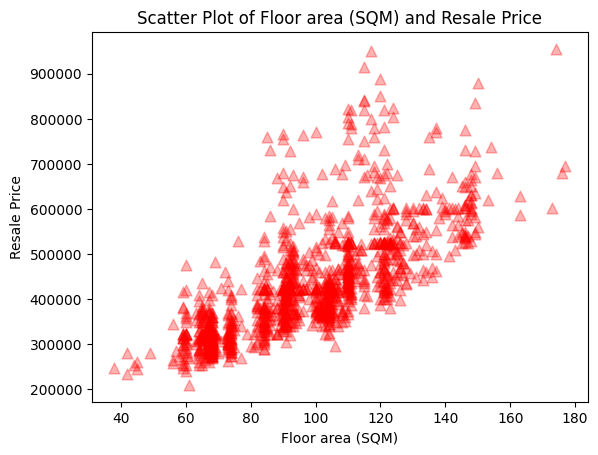

In [13]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Scatter plot for resale price by floor area


plt.scatter(price_sqm['floor_area_sqm'], price_sqm['resale_price'],
            color = "red", marker = "^",
            alpha = 0.3, edgecolors = "face",
            s = 60)
 
plt.xlabel("Floor area (SQM)")
plt.ylabel("Resale Price")
plt.title("Scatter Plot of Floor area (SQM) and Resale Price")
plt.show()


,town,resale_price
0,ANG MO KIO,255000.0
1,ANG MO KIO,275000.0
2,ANG MO KIO,285000.0
3,ANG MO KIO,290000.0
4,ANG MO KIO,290000.0
...,...,...
1245,YISHUN,460000.0
1246,YISHUN,500000.0
1247,YISHUN,525888.0
1248,YISHUN,538000.0


<Figure size 2500x1000 with 0 Axes>

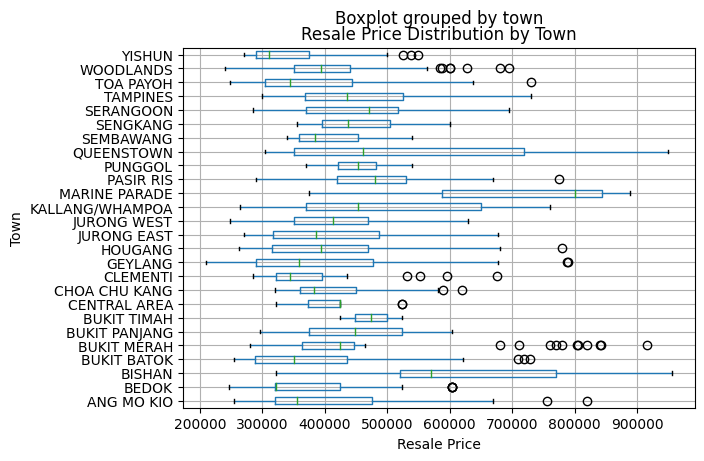

In [14]:
# Table for the Town and resale price
town_price = clean2[["town", "resale_price"]]
display(town_price)


# Box plot for resale price by town
plt.figure(figsize=(25, 10))
town_price.boxplot(column='resale_price', by='town', vert=False)
plt.title('Resale Price Distribution by Town')
plt.xlabel('Resale Price')
plt.ylabel('Town')
plt.xticks(rotation=0)
plt.show()

,Town,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE
0,ANG MO KIO,0,32,19,8,0
1,BEDOK,2,43,24,16,4
2,BISHAN,0,1,15,6,3
3,BUKIT BATOK,0,29,24,7,1
4,BUKIT MERAH,2,20,17,10,0
5,BUKIT PANJANG,0,3,17,21,9
6,BUKIT TIMAH,0,0,1,1,0
7,CENTRAL AREA,0,4,9,2,0
8,CHOA CHU KANG,0,1,33,15,9
9,CLEMENTI,0,17,3,2,0


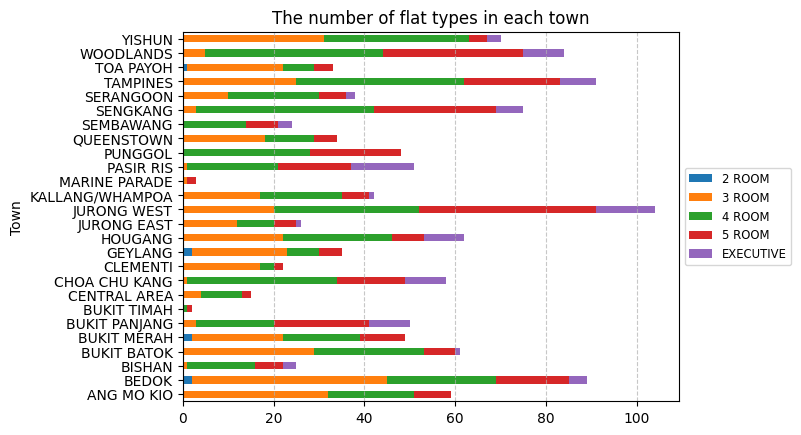

In [15]:
# Table for count of flat type for each town


town_counts_df = clean2.groupby(['town', 'flat_type']).size().unstack(fill_value=0).reset_index()
town_counts_df.columns.name = None  # Remove the column name
town_counts_df.columns = ['Town', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE']
display(town_counts_df)
# Stacked bar graph for different flat type of each town


town_bar = town_counts_df.plot.barh(x='Town', stacked=True, title='The number of flat types in each town')
town_bar.grid(axis='x', linestyle='--', alpha=0.7)
town_bar.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
